# Data Preprocessing

#### Data preprocssing and cleanup to get the data ready for learning. This might include feature vectorization, handling missing data, and dealing with data set imbalance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
parkinsons = pd.read_csv('parkinsons.data')
parkinsons

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
# Removing Status column and adding it to the end of the dataframe.
class_move = parkinsons.pop('status')
parkinsons.insert(23, 'status',class_move)

In [4]:
parkinsons.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [5]:
parkinsons.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


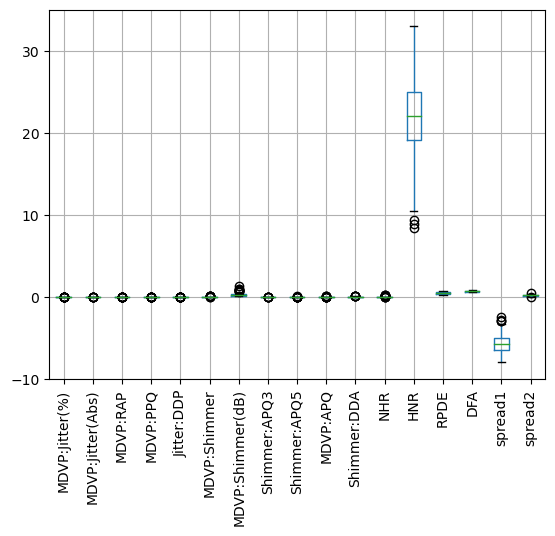

In [6]:
parkinsons.iloc[:,4:21].boxplot(rot=90)
plt.show()

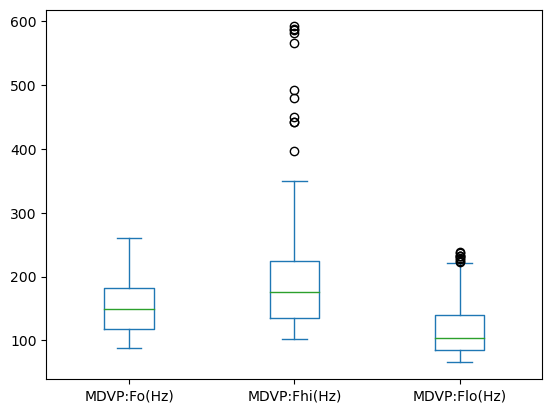

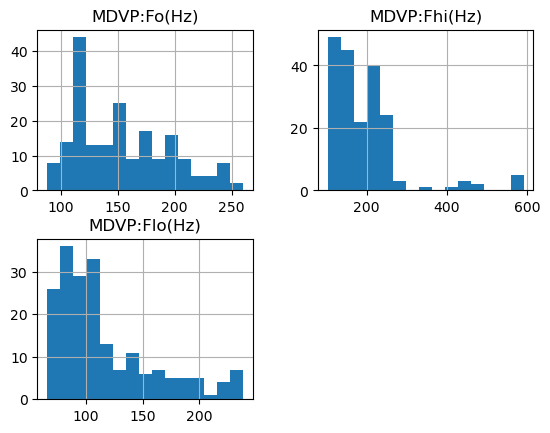

In [7]:
parkinsons.loc[:,['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']].plot(kind='box')
parkinsons.loc[:,['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']].hist(bins=15)

plt.show()

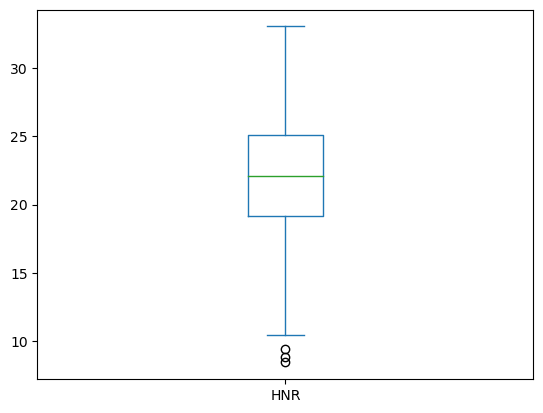

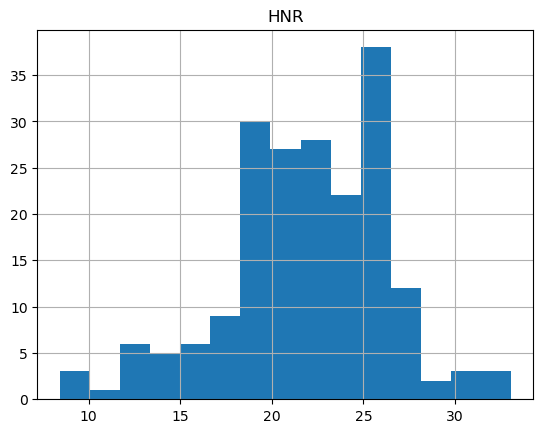

In [8]:
parkinsons.loc[:,['HNR']].plot(kind='box')
parkinsons.loc[:,['HNR']].hist(bins=15)
plt.show()

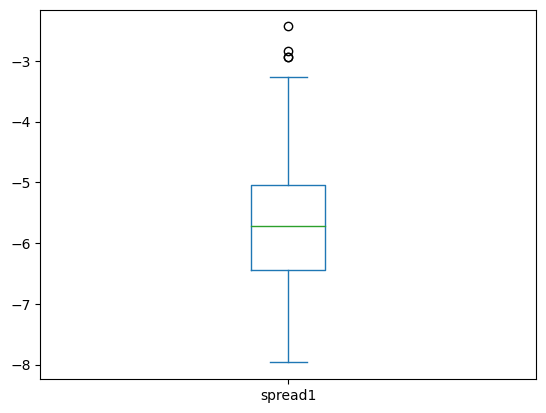

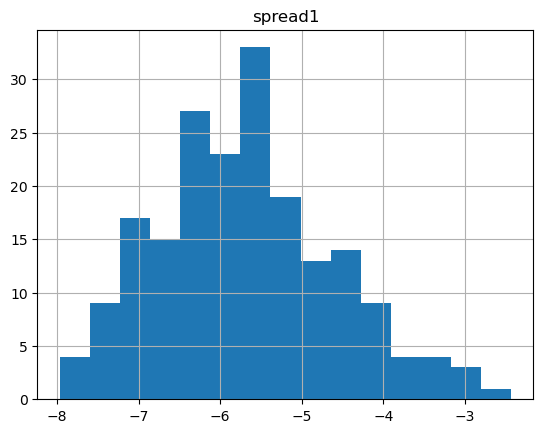

In [9]:
parkinsons.loc[:,['spread1']].plot(kind='box')
parkinsons.loc[:,['spread1']].hist(bins=15)
plt.show()

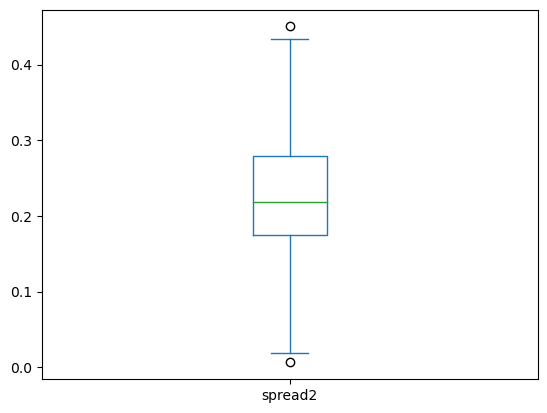

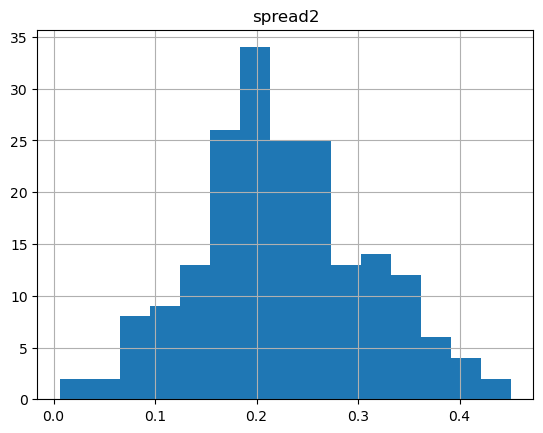

In [10]:
parkinsons.loc[:,['spread2']].plot(kind='box')
parkinsons.loc[:,['spread2']].hist(bins=15)
plt.show()

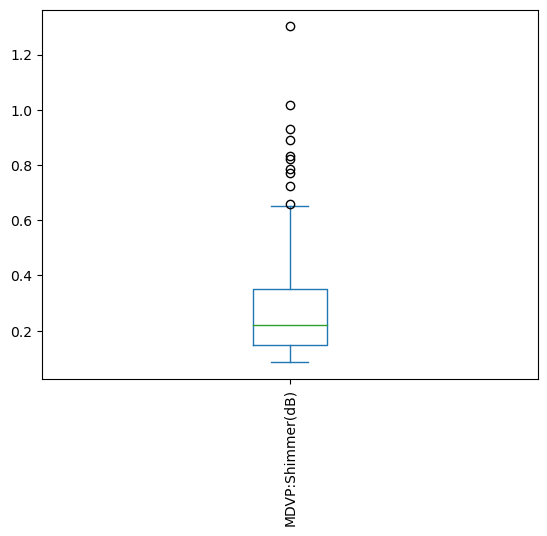

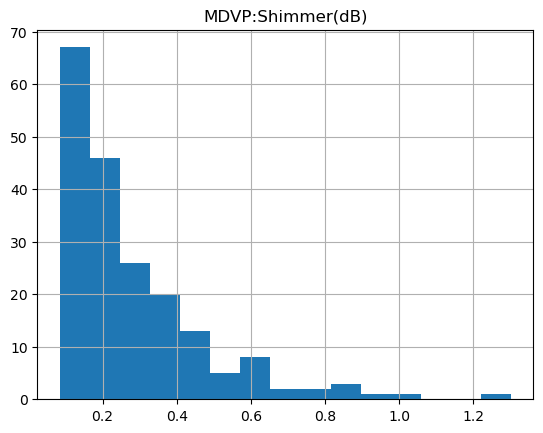

In [11]:
parkinsons.loc[:,['MDVP:Shimmer(dB)']].plot(kind='box', rot=90)
parkinsons.loc[:,['MDVP:Shimmer(dB)']].hist(bins=15)
plt.show()

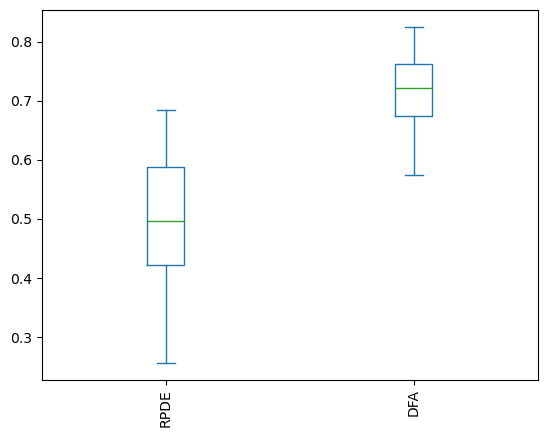

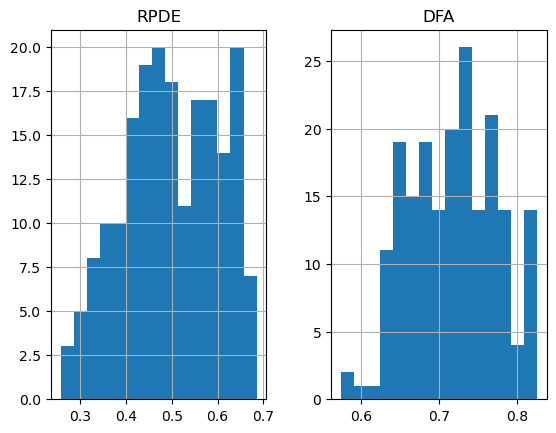

In [12]:
parkinsons.loc[:,['RPDE', 'DFA']].plot(kind='box', rot=90)
parkinsons.loc[:,['RPDE', 'DFA']].hist(bins=15)
plt.show()

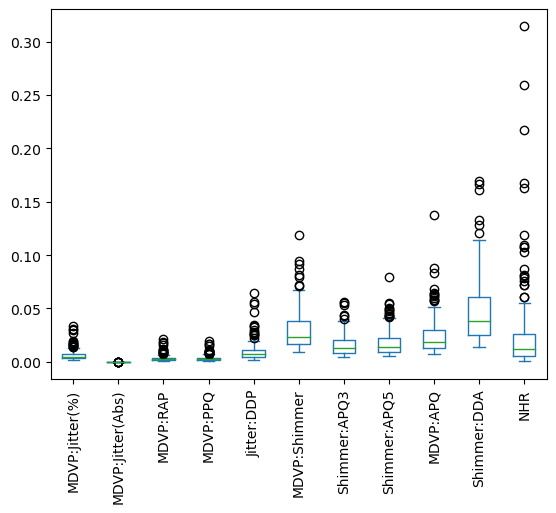

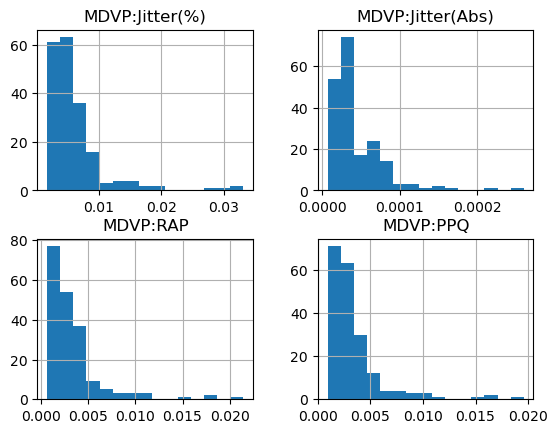

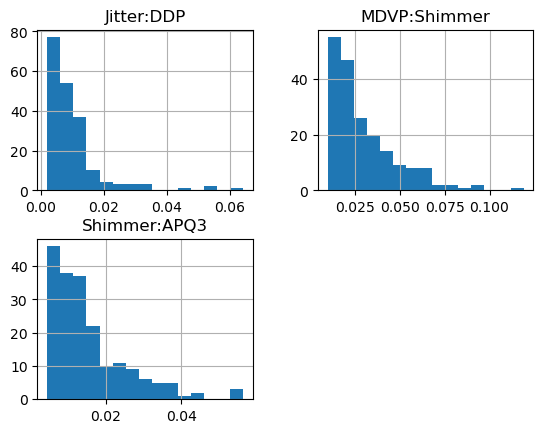

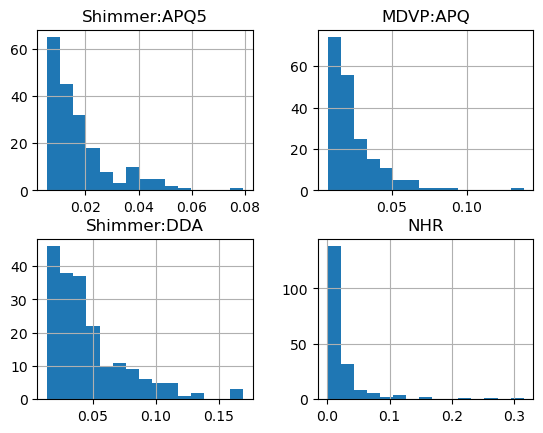

In [13]:
parkinsons.loc[:,['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP',
                  'MDVP:Shimmer','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA',
                  'NHR']].plot(kind='box', rot=90)
parkinsons.loc[:,['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ',
                  ]].hist(bins=15)
parkinsons.loc[:,['Jitter:DDP','MDVP:Shimmer','Shimmer:APQ3'
                  ]].hist(bins=15)
parkinsons.loc[:,['Shimmer:APQ5','MDVP:APQ','Shimmer:DDA',
                  'NHR']].hist(bins=15)

plt.show()

In [14]:
def find_outliers(df_in, col_name):
    Q1 = df_in[col_name].quantile(0.25)
    Q3 = df_in[col_name].quantile(0.75)
    IQR = Q3-Q1
    fence_low  = Q1-1.5*IQR
    fence_high = Q3+1.5*IQR
    outlier_list=((df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)).tolist()
    outlier_indexes=[i for i, x in enumerate(outlier_list) if x]
    return outlier_indexes


bad_indexes=[]
for col in parkinsons.columns:
    if parkinsons[col].dtype in ["int64", "float64"]:
        outlierindexes= find_outliers(parkinsons, col)
        bad_indexes.extend(outlierindexes)

parkinsons.iloc[bad_indexes]


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
73,phon_R01_S19_2,112.014,588.518,107.024,0.00533,0.00005,0.00268,0.00329,0.00805,0.02448,...,0.04120,0.00623,24.178,0.509127,0.789532,-5.389129,0.306636,1.928708,0.225461,1
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774,1
115,phon_R01_S27_1,151.872,492.892,69.085,0.00856,0.00006,0.00404,0.00385,0.01211,0.01843,...,0.02389,0.06051,23.693,0.407701,0.662668,-4.673241,0.261549,2.702355,0.274407,1
116,phon_R01_S27_2,158.219,442.557,71.948,0.00476,0.00003,0.00214,0.00207,0.00642,0.01458,...,0.01818,0.01554,26.356,0.450798,0.653823,-6.051233,0.273280,2.640798,0.170106,1
117,phon_R01_S27_3,170.756,450.247,79.032,0.00555,0.00003,0.00244,0.00261,0.00731,0.01725,...,0.02270,0.01802,25.690,0.486738,0.676023,-4.597834,0.372114,2.975889,0.282780,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


In [15]:
set_indexes = set(bad_indexes)        

len(set_indexes)


195

In [16]:
idx_df = pd.Series(bad_indexes)
vc = idx_df.value_counts()

print(vc[vc > 2])

151    17
152    16
102    15
100    14
149    11
146    11
148    10
99      9
150     8
91      7
147     7
101     7
157     7
98      5
97      4
90      3
89      3
192     3
115     3
4       3
141     3
193     3
17      3
Name: count, dtype: int64


In [17]:
len(set_indexes)

195

In [18]:
idx = pd.DataFrame(vc[vc > 2]).reset_index()
idx

idx_list = pd.Index(idx['index'])
idx_list

Index([151, 152, 102, 100, 149, 146, 148,  99, 150,  91, 147, 101, 157,  98,
        97,  90,  89, 192, 115,   4, 141, 193,  17],
      dtype='int64', name='index')

In [19]:
parkinsons.iloc[idx_list]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,...,0.16942,0.21713,8.441,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367,1
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,...,0.12851,0.16265,9.449,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721,1
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774,1
100,phon_R01_S24_4,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,...,0.16074,0.31482,8.867,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961,1
149,phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,...,0.10546,0.07889,14.989,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173,1
146,phon_R01_S35_1,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,...,0.11411,0.07530,12.359,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533,1
148,phon_R01_S35_3,188.620,216.302,165.982,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,...,0.10422,0.08069,12.298,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646,1
99,phon_R01_S24_3,126.512,141.756,99.770,0.01936,0.00015,0.01159,0.00990,0.03476,0.06734,...,0.10833,0.16744,12.435,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483,1
150,phon_R01_S35_5,186.695,211.961,149.442,0.01872,0.00010,0.01075,0.01154,0.03225,0.05830,...,0.08096,0.10952,12.529,0.507826,0.762726,-4.484303,0.340256,2.958815,0.301487,1
91,phon_R01_S22_1,151.955,163.335,147.226,0.00419,0.00003,0.00224,0.00227,0.00672,0.07959,...,0.13262,0.01658,19.664,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120,1


In [20]:
parkinsons['status'].iloc[idx_list].value_counts()

status
1    21
0     2
Name: count, dtype: int64

In [21]:
parkinsons['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [22]:
# split the data into target and features target is status
y = parkinsons['status']
X = parkinsons.drop(['status'], axis=1)

In [23]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Display the class distribution before balancing
print("Class distribution before balancing:", Counter(y))

# oversampling using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Display the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

Class distribution before balancing: Counter({1: 147, 0: 48})
Class distribution after oversampling: Counter({1: 147, 0: 147})


In [24]:
# create a function to split the dataset into train, validation and test sets
def data_split(X, y, train_size, val_size, test_size, shuffle = True):
    if shuffle:
        idx = np.arange(len(X))
        np.random.shuffle(idx)
        X = X.iloc[idx].reset_index(drop=True)
        y = y.iloc[idx].reset_index(drop=True)

    # check the portion sizes
    if (train_size + val_size + test_size) != 1:
        portion_size = train_size + val_size + test_size * 100
        # normalize portion sizes
        train_size = train_size/ portion_size
        val_size = val_size/ portion_size
        test_size = test_size/ portion_size

    # split data
    split_data = []
    start = 0
    for size in [train_size, val_size, test_size]:
        end = start + int(size * len(X))
        split_data.append((X.iloc[start:end], y.iloc[start:end]))
        start = end
    return split_data


In [25]:
from sklearn.ensemble import RandomForestClassifier

# drop name column from x_resampled
X_resampled = X_resampled.drop(['name'], axis=1)

# split the dataset into train, validation and test sets
train, val, test = data_split(X_resampled, y_resampled, 0.6, 0.2, 0.2)

train_X, train_y = train
val_X, val_y = val
test_X, test_y = test

# show shape of all the data
print("train_X shape:", train_X.shape)
print("train_y shape:", train_y.shape)
print("val_X shape:", val_X.shape)
print("val_y shape:", val_y.shape)
print("test_X shape:", test_X.shape)
print("test_y shape:", test_y.shape)


train_X shape: (176, 22)
train_y shape: (176,)
val_X shape: (58, 22)
val_y shape: (58,)
test_X shape: (58, 22)
test_y shape: (58,)


In [34]:
train_X.to_csv('train_X.csv',index=False)
train_y.to_csv('train_y.csv',index=False)
val_X.to_csv('val_X.csv',index=False)
val_y.to_csv('val_y.csv',index=False)
test_X.to_csv('test_X.csv',index=False)
test_y.to_csv('test_y.csv',index=False)

# Below this section to be removed it is now in Parkinsons_Baseline

In [26]:
# make a scatterplot matrix of the data
import matplotlib.pyplot as plt
import seaborn as sns

# create a dataframe from training set
df = pd.concat([train_X, train_y], axis=1)

# create a pairplot of the data
sns.pairplot(df, hue='status')
plt.show()


In [ ]:
new_parkinsons = parkinsons.drop(['name'], axis=1)

# create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(new_parkinsons.corr(), annot=True, cmap='coolwarm')
plt.show()


In [28]:
#use the Isolation Forest model to search for anomalies
from sklearn.ensemble import IsolationForest

# create the model
clf = IsolationForest(random_state=42, contamination=0.01)
clf.fit(train_X)

# create a column for the predictions
df['anomaly_score'] = clf.decision_function(train_X)
df['outlier'] = clf.predict(train_X)

# show the number of outliers
print(df['outlier'].value_counts())

# show the head of the dataframe
df.head()


outlier
 1    174
-1      2
Name: count, dtype: int64


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,anomaly_score,outlier
0,260.105,264.919,237.303,0.00339,0.000010,0.00205,0.00186,0.00616,0.02030,0.197,...,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587,0,0.270177,1
1,252.455,261.487,182.786,0.00185,0.000007,0.00092,0.00113,0.00276,0.01152,0.103,...,26.805,0.610367,0.635204,-7.319510,0.200873,2.028612,0.086398,0,0.233540,1
2,203.184,211.526,196.160,0.00178,0.000009,0.00094,0.00106,0.00283,0.00958,0.085,...,33.047,0.340068,0.741899,-7.964984,0.163519,1.423287,0.044539,0,0.162359,1
3,145.174,198.109,80.637,0.00733,0.000050,0.00414,0.00422,0.01242,0.02362,0.233,...,18.857,0.637518,0.735546,-5.594275,0.127950,1.765957,0.222716,1,0.261249,1
4,169.774,191.759,151.451,0.01568,0.000090,0.00863,0.00946,0.02589,0.08143,0.821,...,12.359,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533,1,0.117293,1


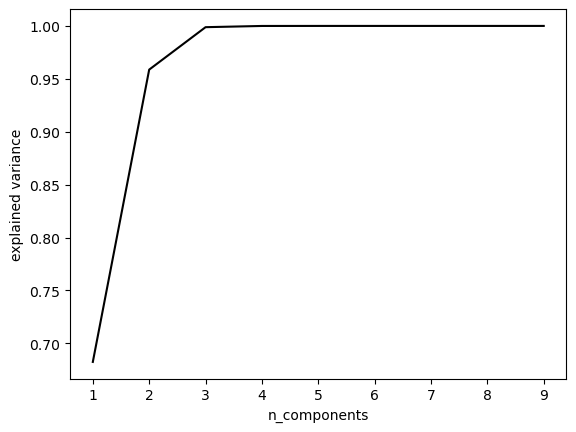

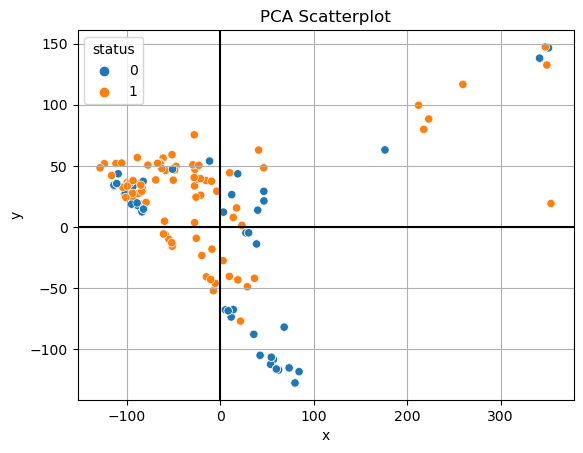

,x,y,status
0,80.073032,-127.674831,0
1,68.492604,-82.010672,0
2,11.827638,-73.737285,0
3,-26.968768,47.127579,1
4,-19.542765,-23.359404,1
...,...,...,...
171,347.817079,147.316406,1
172,29.101521,-48.960497,1
173,-51.718747,-12.961912,1
174,8.582932,-68.647761,0


In [31]:
# use principal component analysis to determine categories for the data
from sklearn.decomposition import PCA


# test n_number of components to find the best fit for the data
n_components = np.arange(1, 10)
models = [PCA(n).fit(train_X) for n in n_components]

# plot the explained variance ratio for each number of components
plt.plot(n_components, [m.explained_variance_ratio_.sum() for m in models], color='black')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()


# create the model
pca = PCA(n_components = 2)

# fit the model
pca.fit(train_X, train_y)

# transform the data
transformed = pca.transform(train_X)

# create a dataframe of the transformed data
df = pd.DataFrame(transformed, columns=['x', 'y'])
df['status'] = train_y

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='status', data=df)

# make title
plt.title('PCA Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()


# color is incorrect and is not based on clusters right now

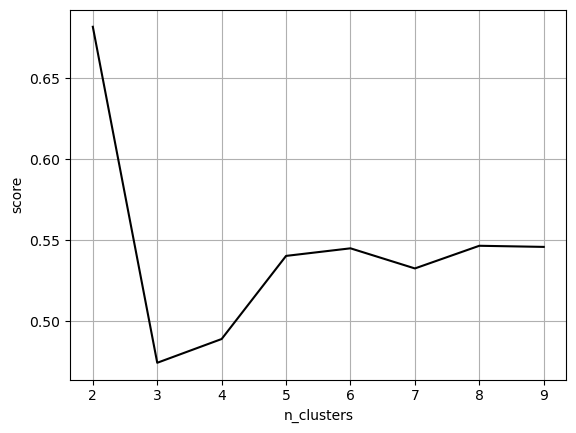

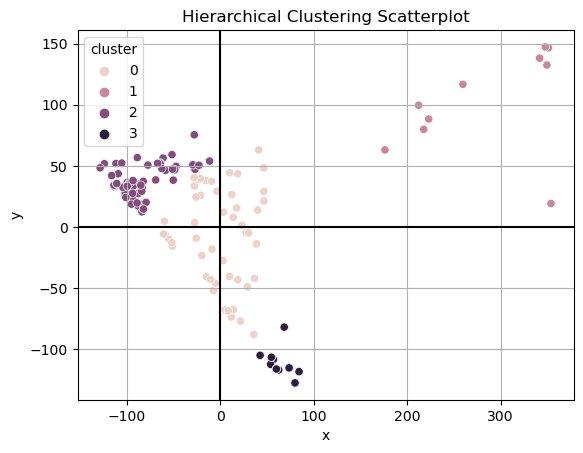

In [30]:
# create a heirarchical clustering model
from sklearn.cluster import AgglomerativeClustering

# find the optimal number of clusters
n_clusters = range(2, 10)
models = [AgglomerativeClustering(n).fit(train_X) for n in n_clusters]

# plot the silhouette scores
from sklearn.metrics import silhouette_score
scores = [silhouette_score(train_X, m.labels_) for m in models]
plt.plot(n_clusters, scores, color='black')
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.grid()
plt.show()

# create the model
hi_model = AgglomerativeClustering(n_clusters=4)

# fit the model
hi_model.fit(train_X, train_y)

# create a column for the cluster
df['cluster'] = hi_model.labels_

# create a scatterplot of the data
sns.scatterplot(x='x', y='y', hue='cluster', data=df)

# make title
plt.title('Hierarchical Clustering Scatterplot')
plt.grid()
# add lines to thicken the 0 lines
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# show the plot
plt.show()


In [ ]:
df

In [ ]:
# create a decision tree based on the train set
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# fit the model
dt.fit(train[0], train[1])

# add the validation set to the train set to test the models validation accuracy
X_vtrain = pd.concat([train[0], val[0]])
y_vtrain = pd.concat([train[1], val[1]])

# check the decision tree's validation accuracy
y_pred = dt.predict(X_vtrain)
accuracy_score(y_vtrain, y_pred)